In [1]:
#importing the library package for modeling and metrics for model evaluation.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for data visualization
import joypy
from pandas import plotting
from pandas.plotting import parallel_coordinates

import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
init_notebook_mode(connected = True)

import plotly.figure_factory as ff
from bubbly.bubbly import bubbleplot
import plotly_express as px
from sklearn.metrics import plot_confusion_matrix

In [2]:
# let's import the data
data = pd.read_csv('dataset/insurance_claim_merged.csv')
# let's take a look at the data
pd.set_option('display.max_columns', None)
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital.gains,capital.loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,5,37,939011,7/16/2002,IN,250/500,500,1145.28,0.0,360963,FEMALE,Associate,priv-house-serv,movies,husband,54735,88553,2/6/2015,Single Vehicle Collision,Front Collision,Minor Damage,Other,NY,Hillsdale,6770 1st St,20,1,?,2,1,YES,96200.0,3000,500,58870,Saab,92x,1997,N
1,462,58,902576,11/28/2002,IL,500/1000,1000,1156.80,0.0,432568,FEMALE,MD,exec-managerial,camping,other-relative,1381,50621,1/18/2015,Multi-vehicle Collision,Rear Collision,Total Loss,Other,SC,Arlington,3275 Pine St,11,2,?,0,5,?,31200.0,3830,7370,32130,Saab,95,2006,N
2,198,51,575784,5/12/2007,OH,100/300,2000,751.02,0.0,712296,FEMALE,High School,farming-fishing,golf,own-child,0,0,2/13/2015,Parked Car,?,Trivial Damage,None,SC,Arlington,1741 Best Ridge,0,1,NO,1,3,?,14500.0,0,0,5690,Chevrolet,Malibu,1996,N
3,384,47,102488,2/10/1998,OH,100/300,500,1137.34,1000000.0,402197,FEMALE,High School,transport-moving,bungie-jumping,husband,0,42211,1/27/2015,Vehicle Theft,?,Trivial Damage,Police,WV,Springfield,9744 Texas Drive,6,1,YES,1,1,NO,7500.0,0,0,420,Saab,95,1990,N
4,100,27,1129102,3/1/2012,IL,100/300,2000,1082.70,4000000.0,577005,FEMALE,PhD,armed-forces,exercise,husband,0,0,2/21/2015,Vehicle Theft,?,Minor Damage,None,OH,Northbrook,3289 Britain Drive,5,1,NO,2,1,YES,16500.0,5400,4300,8270,Toyota,Highlander,1998,N
5,306,50,769636,1/9/1999,IN,100/300,500,1386.90,3000000.0,478119,FEMALE,High School,armed-forces,dancing,wife,0,5905,2/17/2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NY,Columbus,4633 5th Lane,6,2,YES,1,1,NO,37710.0,14780,5400,48800,Honda,Civic,1995,N
6,105,27,948899,4/4/2003,IL,250/500,2000,1161.78,5000000.0,377775,MALE,MD,farming-fishing,basketball,not-in-family,0,1185,2/12/2015,Multi-vehicle Collision,Rear Collision,Total Loss,Other,VA,Northbrook,3653 Elm Drive,11,3,?,0,1,YES,36400.0,6100,190,27630,Chevrolet,Tahoe,2005,N
7,249,49,330251,7/24/2012,IN,100/300,2000,1411.67,0.0,505288,MALE,JD,transport-moving,hiking,own-child,16759,77869,2/17/2015,Single Vehicle Collision,Front Collision,Total Loss,Fire,NY,Riverwood,1580 Maple Lane,3,1,NO,0,3,?,83000.0,16000,770,58000,Accura,RSX,2009,N
8,44,28,136414,5/8/1995,IL,100/300,500,1529.81,0.0,436652,MALE,Associate,tech-support,kayaking,not-in-family,0,0,1/3/2015,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,WV,Columbus,4862 Lincoln Hwy,22,1,NO,3,2,?,34510.0,11000,5880,24800,BMW,M5,2005,N
9,104,35,701032,7/5/2014,IL,250/500,500,1233.94,0.0,538379,MALE,Associate,protective-serv,movies,husband,0,19249,2/21/2015,Multi-vehicle Collision,Side Collision,Major Damage,Other,NC,Arlington,7609 Rock St,16,4,YES,1,2,?,91100.0,11410,14160,59520,Audi,A5,2000,N


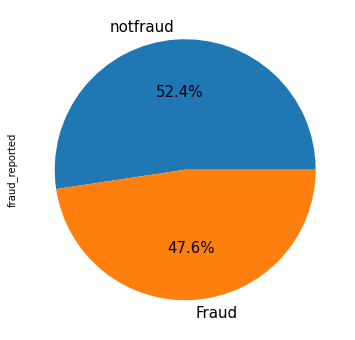

In [6]:

fig = plt.figure(figsize=(10,6))
ax = (data['fraud_reported'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = [ 'notfraud','Fraud'],
         fontsize=15) 

In [7]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital.gains', 'capital.loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# DATATYPES OF THE COLUMNS

In [8]:
pd.DataFrame(data=data.dtypes.values,index=data.dtypes.index).T

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital.gains,capital.loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,int64,int64,int64,object,object,object,int64,float64,float64,int64,object,object,object,object,object,int64,int64,object,object,object,object,object,object,object,object,int64,int64,object,int64,int64,object,float64,int64,int64,int64,object,object,int64,object


In [9]:
# _c39 -- contains all nan values , so drop them
# insured_zip, policy_number , incident_location ---- Since all the values are unique and can be unique for every person , 
#                                                    they don't provide any information ; so, we'll drop these featuresDROP THE FOLLOWING COLUMNS THAT HAS NO
data=data.drop(['insured_zip', 'policy_number' , 'incident_location'],axis=1)
#CONVERT THE FOLLOWING COLUMNS TO THEIR RELEVANT DATATYPE
data.auto_year=pd.to_datetime(data.auto_year,format="%Y")
data.policy_bind_date=pd.to_datetime(data.policy_bind_date)
data.incident_date=pd.to_datetime(data.incident_date)

In [10]:
data.shape

(11211, 36)

# DATA CLEANING 

In [11]:
# let's check whether the data has any null values or not.

# but there are '?' in the datset which we have to remove by NaN Values
data = data.replace('?',np.NaN)

data.isnull().any()

months_as_customer             False
age                            False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital.gains                  False
capital.loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
bodily_injuries                False
witnesses                      False
p

In [12]:
pd.DataFrame(data=data.isnull().sum().values,index=data.isnull().sum().index).T

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital.gains,capital.loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1618,0,0,0,0,0,0,4229,0,0,3920,0,0,0,0,0,0,0,0


In [13]:
# missing value treatment using fillna

# we will replace the '?' by the most common collision type as we are unaware of the type.
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
data['property_damage'].fillna('NO', inplace = True)

# again, if there are no responses fpr police report available then we might take it as No report available
data['police_report_available'].fillna('NO', inplace = True)

data.isnull().any().any()

False

# Data Encoding

In [14]:
# One Hot Encoding

sex_map={'MALE':1,'FEMALE':0}
data.insured_sex=data.insured_sex.map(sex_map)

yes_no_map={'YES':1,"NO":0}
data.property_damage=data.property_damage.map(yes_no_map)

data.police_report_available=data.police_report_available.map(yes_no_map)

fraud_map={'Y':1,"N":0}
data.fraud_reported=data.fraud_reported.map(fraud_map)

In [15]:
# Mean Encoding 

policy_state_map=data.groupby(['policy_state'])['fraud_reported'].mean().to_dict()

data.policy_state=data.policy_state.map(policy_state_map)

policy_csl_map=data.groupby(['policy_csl'])['fraud_reported'].mean().to_dict()

data.policy_csl=data.policy_csl.map(policy_csl_map)

insured_hobby_map=data.groupby(['insured_hobbies'])['fraud_reported'].mean().to_dict()
data.insured_hobbies=data.insured_hobbies.map(insured_hobby_map)

insured_relation_map=data.groupby(['insured_relationship'])['fraud_reported'].mean().to_dict()
data.insured_relationship=data.insured_relationship.map(insured_relation_map)

collision_map=data.groupby(['collision_type'])['fraud_reported'].mean().to_dict()
data.collision_type=data.collision_type.map(collision_map)

incident_state_map=data.groupby(['incident_state'])['fraud_reported'].mean().to_dict()
data.incident_state=data.incident_state.map(incident_state_map)

incident_city_map=data.groupby(["incident_city"])['fraud_reported'].mean().to_dict()
data.incident_city=data.incident_city.map(incident_city_map)

auto_make_map=data.groupby(["auto_make"])['fraud_reported'].mean().to_dict()
data.auto_make=data.auto_make.map(auto_make_map)

# we'll remove this column as it contains too many unique categ values---any manufactureer can have several models
auto_model_map=data.groupby(["auto_model"])['fraud_reported'].mean().to_dict()
data.auto_model=data.auto_model.map(auto_model_map)

In [16]:
# Target Guided Ordinal Encoding

occupation_map={j:i+5 for i,j in enumerate(data.groupby(["insured_occupation"])['fraud_reported'].mean().sort_values().index)}
data.insured_occupation=data.insured_occupation.map(occupation_map)

severity_map={j:i+5 for i,j in enumerate(data.groupby(["incident_severity"])['fraud_reported'].mean().sort_values().index)}
data.incident_severity=data.incident_severity.map(severity_map)

authorities_map={j:i+5 for i,j in enumerate(data.groupby(["authorities_contacted"])['fraud_reported'].mean().sort_values().index)}
data.authorities_contacted=data.authorities_contacted.map(authorities_map)

In [17]:
# Freq encoding 

incident_type_map=data.incident_type.value_counts().to_dict()
data.incident_type=data.incident_type.map(incident_type_map)

# Ordinal encoding 

education_map={'High School':1,'College':2,'Associate':3,'Masters':4,'JD':5,'MD':6,'PhD':7}
data.insured_education_level=data.insured_education_level.map(education_map)

In [18]:
# Creating New Features

# claim_duration = policy_bind_date -incident_date 
# car_duration = auto_year - incident_date  

data['claim_duration']=(data['incident_date']-data['policy_bind_date']).dt.days
data['car_duration']=(data.incident_date-data.auto_year).dt.days

# Removing Unnecessary columns

data=data.drop(['incident_date','policy_bind_date','auto_year','auto_model'],axis=1)

# Feature Selection Method Combine

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

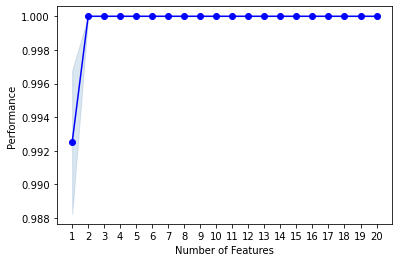

In [22]:
# WRAPPER METHOD - SEQUENTIAL FEATURE SELECTOR

from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier

sfs=sfs(KNeighborsClassifier(n_neighbors=10,weights='distance',metric='euclidean'),k_features=20,forward=True,floating=False,scoring='recall',cv=3)
sfs.fit(data.drop(['fraud_reported'],axis=1),data.fraud_reported)
plot_sfs(sfs.get_metric_dict(),kind='std_dev')

In [23]:
sfs_support=[True if list(sfs.k_feature_names_).count(col)==1  else False for col in data.drop(['fraud_reported'],axis=1).columns ]
data.drop(['fraud_reported'],axis=1)[list(sfs.k_feature_names_)].columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'auto_make', 'claim_duration'],
      dtype='object')

In [24]:
# WRAPPER METHOD - RECURSIVE FEATURE ELIMINATION

from sklearn.feature_selection import chi2 , f_classif ,mutual_info_classif,RFE

rfe=RFE(RandomForestClassifier(),n_features_to_select=20)
rfe=rfe.fit(data.drop(['fraud_reported'],axis=1),data.fraud_reported)
rfe_support=rfe.get_support()
data.drop(['fraud_reported'],axis=1).columns[rfe_support]

Index(['months_as_customer', 'policy_state', 'policy_csl',
       'policy_annual_premium', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'auto_make',
       'claim_duration', 'car_duration'],
      dtype='object')

In [25]:
# INTRINSIC FEATURE SELECTION - RANDOM FOREST

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
embeded_rf_selector.fit(data.drop(['fraud_reported'],axis=1),data.fraud_reported)
embeded_rf_support = embeded_rf_selector.get_support()
data.drop(['fraud_reported'],axis=1).columns[rfe_support]

Index(['months_as_customer', 'policy_state', 'policy_csl',
       'policy_annual_premium', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'total_claim_amount', 'property_claim', 'vehicle_claim', 'auto_make',
       'claim_duration', 'car_duration'],
      dtype='object')

In [26]:
# INTRINSIC FEATURE SELECTION - XGBOOST

from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

xgb = SelectFromModel(XGBClassifier(use_label_encoder=False,eval_metric='error'), max_features=33)
xgb.fit(data.drop(['fraud_reported'],axis=1),data.fraud_reported)
xgb_support = xgb.get_support()
data.drop(['fraud_reported'],axis=1).columns[xgb_support]

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_hobbies',
       'incident_severity', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available'],
      dtype='object')

In [27]:
# FILTER METHOD - CORRELATION

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


cor_support, cor_feature = cor_selector(data.drop(['fraud_reported'],axis=1),data.fraud_reported,20)
data.drop(['fraud_reported'],axis=1).columns[cor_support]

Index(['policy_csl', 'umbrella_limit', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital.loss', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make'],
      dtype='object')

In [28]:
# FILTER METHOD - CHI2

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(data.drop(['fraud_reported'],axis=1))
chi_selector = SelectKBest(chi2, k=20)
chi_selector.fit(X_norm, data.fraud_reported)
chi_support = chi_selector.get_support()
data.drop(['fraud_reported'],axis=1).columns[chi_support]

Index(['policy_state', 'policy_csl', 'umbrella_limit', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make'],
      dtype='object')

## Superior Feature Selection 
#### combine 6 feature selection SFS,RFE,IFS-RF,IFS-XGB,correlation and CHI2

In [29]:
feature_selection=pd.DataFrame(data={'Features':data.drop(['fraud_reported'],axis=1).columns,"Person_corr":cor_support,'CHI2':chi_support,
                                                        "SFS":sfs_support,'RFE':rfe_support,'Rand-Forest':embeded_rf_support,"XGB":xgb_support})
feature_selection['Total'] = np.sum(feature_selection, axis=1)

feature_selection_df = feature_selection.sort_values(['Total'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Features,Person_corr,CHI2,SFS,RFE,Rand-Forest,XGB,Total
1,incident_severity,True,True,True,True,True,True,6
2,insured_hobbies,True,True,True,True,True,True,6
3,policy_csl,True,True,True,True,False,True,5
4,auto_make,True,True,True,True,True,False,5
5,incident_city,True,True,True,True,False,True,5
6,incident_state,True,True,True,True,False,True,5
7,insured_occupation,True,True,True,True,True,False,5
8,collision_type,True,True,True,True,False,False,4
9,policy_state,False,True,True,True,False,True,4
10,insured_relationship,True,True,True,True,False,False,4


In [30]:
# We take the top 20 features

feature_selection_df.loc[:20,'Features'].values

array(['incident_severity', 'insured_hobbies', 'policy_csl', 'auto_make',
       'incident_city', 'incident_state', 'insured_occupation',
       'collision_type', 'policy_state', 'insured_relationship',
       'witnesses', 'authorities_contacted', 'incident_type',
       'number_of_vehicles_involved', 'total_claim_amount',
       'vehicle_claim', 'property_claim', 'claim_duration',
       'bodily_injuries', 'injury_claim'], dtype=object)

<ipython-input-31-518e350a04e0>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'incident_severity'),
 Text(1, 0, 'insured_hobbies'),
 Text(2, 0, 'policy_csl'),
 Text(3, 0, 'auto_make'),
 Text(4, 0, 'incident_city'),
 Text(5, 0, 'incident_state'),
 Text(6, 0, 'insured_occupation'),
 Text(7, 0, 'collision_type'),
 Text(8, 0, 'policy_state'),
 Text(9, 0, 'insured_relationship'),
 Text(10, 0, 'witnesses'),
 Text(11, 0, 'authorities_contacted'),
 Text(12, 0, 'incident_type'),
 Text(13, 0, 'number_of_vehicles_involved'),
 Text(14, 0, 'total_claim_amount'),
 Text(15, 0, 'vehicle_claim'),
 Text(16, 0, 'property_claim'),
 Text(17, 0, 'claim_duration'),
 Text(18, 0, 'bodily_injuries'),
 Text(19, 0, 'injury_claim')]

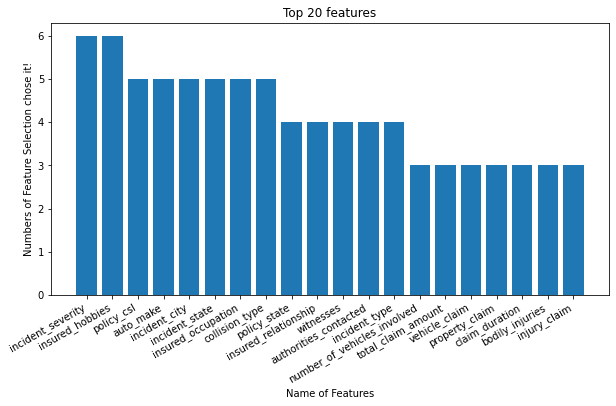

In [31]:
fig, (ax1) = plt.subplots(1, figsize=(10, 5))
features = feature_selection_df.loc[:20,'Features'].values
featureselect = [6,6,5,5,5,5,5,5,4,4,4,4,4,3,3,3,3,3,3,3]
ax1.bar(features,featureselect)

plt.draw()
plt.title('Top 20 features')
plt.xlabel('Name of Features')
plt.ylabel('Numbers of Feature Selection chose it!')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')